# Data Analysis of the Titanic Dataset
<img src="http://thetimes-tribune.com/polopoly_fs/1.1300009!/image/3770210587.jpg_gen/derivatives/landscape_700/3770210587.jpg" style="float:center;width:600px;height:500px;">


##### This objective of this notebook is analyzing titanic dataset to study the factors that made titanic passengers more likely to survive. The analysis process will go through the following phases:
- [Questioning Phase](#1)
- [Data Wrangling Phase](#2)
 - [Data Aquisition](#2.1)
 - [Data Cleaning](#2.2)
   - [Creating New Columns](#2.2.1)
   - [Dropping Columns](#2.2.2)
   - [Converting Columns](#2.2.3)
   - [Dealing with Missing Data](#2.2.4)  
- [Exploration Phase](#3)
 - [Variables Distribution](#3.1)
 - [Studying Passengers Survival Factors](#3.2)
- [Conclusions Phase](#4)

<mark>Note:</mark> the first three phases contain overlapping parts. Hence, conducting them is an iterative and incremental process.
<hr>


<a id='1'></a>

## First Phase: Extracting Questions

To come up with questions, I started with loading the data and exploring it. I came up with the following questions.


##### Main Question:  What factors made titanic passengers more likely to survive ?
###### Possible factors:
 - Gender of the passenger
 - Age of the passenger
 - Pclass of the passenger
 - Travelling alone or with family
 - From where the passenger embarked
 - Fare amount
 - Jobs of the passengers


##### Other interesting questions:
 - What gender/age is likely to travel alone?
 - What is the survival rate of crew members?
 - What is the survival rate of children travelling with nannies ?
 - What are the traits of people who paid more?
 - General statistics of the ship's passengers.



<hr>



<a id='2'></a>

## Second Phase: Wrangling the Data

This phase includes both aquiring or loading the data and cleaning it.

##### Data Aquisition:
For this dataset, the aquiring process is fairly easy and simple. It's directly done by loading the csv file into a pandas dataframe. Pandas dataframes are special kind of data structure that facilitates analyzing and manipulating the dataset.

##### Data Cleaning:
This icludes dealing missing data, duplicate rows and inconsistent column names. It also includes finding outliers, investigate its accuracy, then finaly dealing with it.

In [1]:
#for data analysis
import pandas as pd

#for numeric manipulation
import numpy as np

#for data visualization
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns

#setting the graph's backround style
sns.set_style('whitegrid')

#setting the graph text size
sns.set(font_scale=1.5)

#to show matplotlib graphs in the notebook's window
%matplotlib inline 

#to set the figure size
pylab.rcParams[ 'figure.figsize' ] = 10 , 8

#to ignore any warnings along this notebook
import warnings
warnings.filterwarnings('ignore')

<a id='2.1'></a>

In [2]:
#data aquisition
df= pd.read_csv("titanic-data.csv")

#to display a top sample of the dataset 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#to get shape of the table: (rows #, columns #)
print("Table shape:\n(row#,col#) \n"+str(df.shape)+"\n\n")

#to find the columns data types in case if any column needed type conversion
print(df.info())

#to find descriptive statistics metrics on numerical columns
df.describe()

Table shape:
(row#,col#) 
(891, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations:
- From Count values: Age, Cabin and Embarked columns have values less than 891 which is the rows number. Hence, these columns have missing values.
- Pclass: from looking at the mean value, we can conclude that third class represent the largest group out of the three classes
- Age: since the mean (29.699) and median (28) are close to each other, there is a high possiblity that age is normally distributed
- SibSp and Parch: Majority of the passengers are travelling alone
- Fare: it's highly distrubted variable and has outliers
---------------------------


<a id='2.2'></a>

In [4]:
#functions defined to clean the data


def travelingWith(passenger):
    """
    This function is defined to classify the passenger based on values of 5 attributes. 
    This classification is then used to create a new column in the DataFrame.

    Argument: Subset row of Pandas DataFrame
    return: String label or clasification
    """

    #row values is seprated and stored in 0D variable
    Age,FamilySize,Gender,Parch,SibSp=passenger

    #Passenger classification
    if(Age<16):
        if(FamilySize==1):
            label='Child TW/ Nanny'
        elif(FamilySize>0):
            #label='Child TW/ Family'
            if(Parch>0 and SibSp>0):
                label='Child TW/ Family'
            elif(Parch>0):
                label='Child TW/ Sibling'
            elif(SibSp>0):
                label='Child TW/ Parent'
    else:
        if(Gender=='female'):
            if(FamilySize==0):
                label='Female Traveling Alone'
            else:
                label='Female TW/ Family'
        else:
            if(FamilySize==0):
                label='Male Traveling Alone'
            else:
                label='Male TW/ Family'
    return label

#________________________________________________________________________________________________________________________________


def getAgeEstimates(Column):
    """
    This function is defined to create list of randomly generated values within the range of 1std from the column's mean. 
    The length of this generated list is the number of NaN values found in the passed column.

    Argument: Pandas Series
    return: Numpy Array 
    """
    
    ageAvg=Column.dropna().mean()
    ageStd=Column.dropna().std()
    NumOfNan=Column.isnull().sum()
    
    rand = np.random.randint(ageAvg - ageStd, ageAvg + ageStd, size = NumOfNan)

    return rand
#Credit: parts of the idea/code were inspired from the following (https://www.kaggle.com/omarelgabry/a-journey-through-titanic).


<a id='2.2.1'></a>

### Creating new columns from the existing columns
* Family size
* Title
* Traveling with

Note: The <Traveling with> variable depends on passengers' age. Hence, this [variable/column creation](#return) is done after filling the missing age values. 

In [5]:
# add new column for family size by simply adding columns that represent non-overlapping number of family members
# adding 1 to include the passenger
df['FamilySize']=df['Parch']+df['SibSp']+1

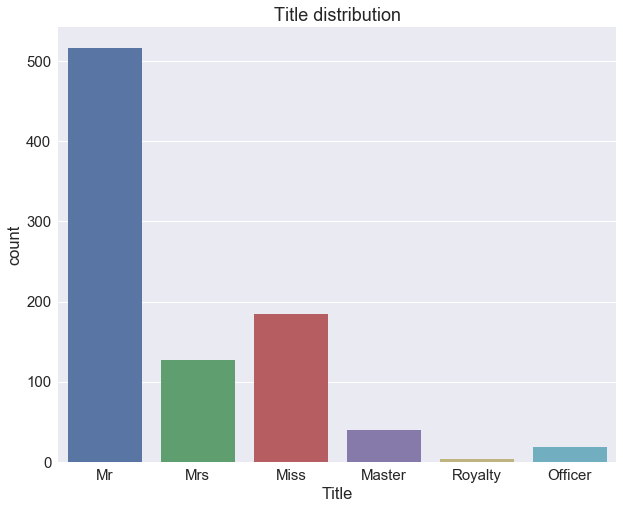

In [6]:
# add new column for title by extracting it from the name column
# fills the cell with NaN if title not found mentioned in the name
# RE used match the first occurance of a word end in (.)
df['Title']=df['Name'].str.extract(r' ([\S]+)\.',expand=False)


# map of titles and its alternative/ matching titles
Title_Dict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }


# replaces titles using the previosuly defined dictionary
# the purpose of this replacement is to unify the used titles and reduce its group size to have better result durnig analysis phase.
df['Title'] = df['Title'].map( Title_Dict, na_action='ignore')
#credit: (https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial)

#Title distribution
sns.countplot(x="Title", data=df)
plt.title("Title distribution")


<a id='run'></a>


<a id='2.2.2'></a>

### Dropping useless columns
* Passenger id
* Name
* Ticket

In [7]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

<a id='2.2.3'></a>

### Converting categorical variables to numerical for calculating correlation
* Gender
* Embarked
* Title

In [8]:
#1 for female, 0 for male
df['BooleanGender']=(df['Sex'] == 'female').astype(int)

#1:S , C:2 , Q:3
df['NumericalEmbarked']= df['Embarked'].apply(lambda x: 1 if x=='S' else (2 if x=='C' else (3 if x=='Q' else np.nan)))

#1:'Master' ,2:'Miss' ,3:'Mrs' ,4:'Mrs' ,5:'Royalty' ,6:'Officer'
df['NumericalTitle']= df['Title'].apply(lambda x: 1 if x=='Master' else (2 if x=='Miss'  else (3 if x=='Mrs' else (4 if x=='Mr' else (5 if x=='Royalty' else (6 if x=='Officer' else np.nan))))))

#Converted to show better visualization
df['NumericalSurvived']=df['Survived'].copy()
df['Survived']= df['Survived'].apply(lambda x: 'Yes' if x==1 else ('No' if x==0 else np.nan))

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Title,BooleanGender,NumericalEmbarked,NumericalTitle,NumericalSurvived
0,No,3,male,22.0,1,0,7.2500,NaN,S,2,Mr,0,1.0,4.0,0
1,Yes,1,female,38.0,1,0,71.2833,C85,C,2,Mrs,1,2.0,3.0,1
2,Yes,3,female,26.0,0,0,7.9250,NaN,S,1,Miss,1,1.0,2.0,1
3,Yes,1,female,35.0,1,0,53.1000,C123,S,2,Mrs,1,1.0,3.0,1
4,No,3,male,35.0,0,0,8.0500,NaN,S,1,Mr,0,1.0,4.0,0


<a id='heatmap'></a>

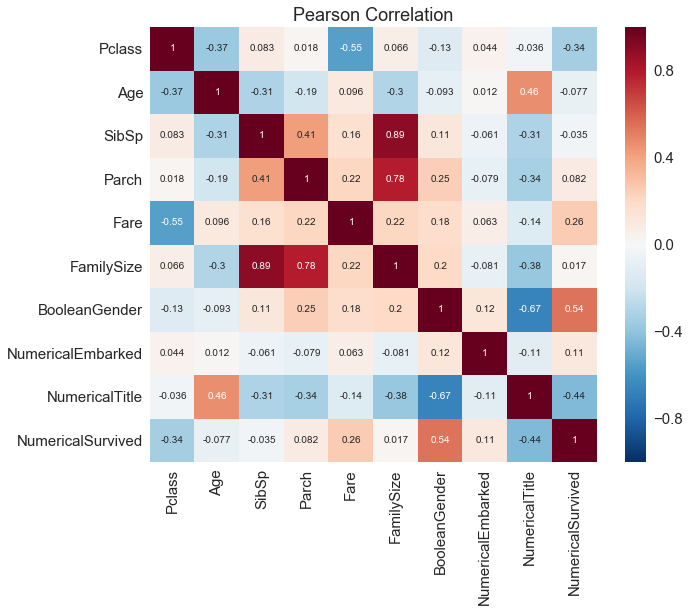

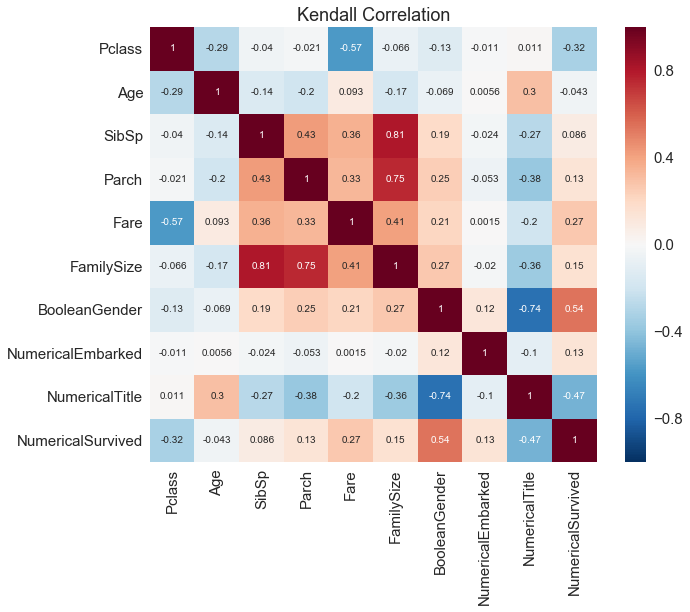

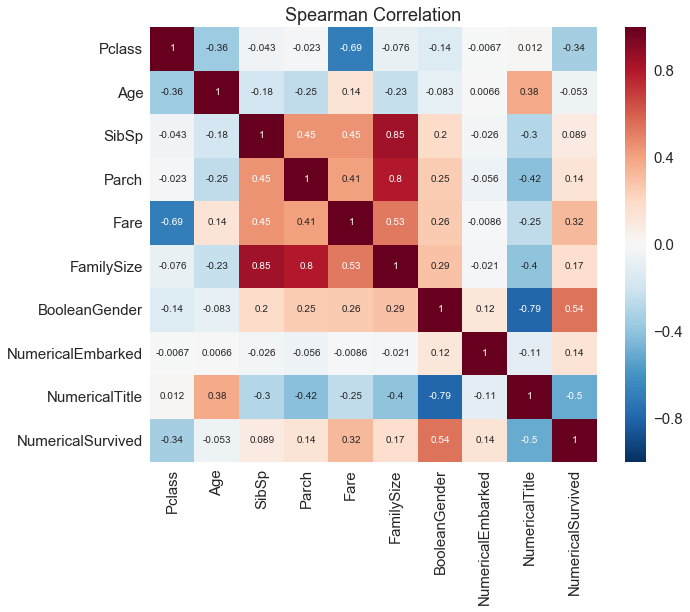

In [9]:
# Finding variables cross correlation the visualize it using heatmap

sns.heatmap(df.corr(), annot=True)
plt.title("Pearson Correlation")
plt.show()

sns.heatmap(df.corr(method='kendall'), annot=True)
plt.title("Kendall Correlation")
plt.show()

sns.heatmap(df.corr(method='spearman'), annot=True)
plt.title("Spearman Correlation")
plt.show()


<a id='2.2.4'></a>

### Dealing with missing data:
There are two options to fix this issue. Either by dropping such rows/columns or by filling it with a suitable value. As mentioned above, three columns detected to have missing data in this dataset which are age,cabin, and embarked column. 

----------
- **__Cabin column:__**

Passengers are more likely to round around the ship then staying in the cabin when the collision happened. In other words, i highly doubt that the cabin number will correlate with the survival rate. If it did, i would consider the possiblity of it to be a considence and conduct futher testing. Moreover, filling such column is an expensive process since the majority of the values are missing and its hard to find close estimation of the real values. Hence, <b>dropping it</b> would be the most suitable solution.



In [10]:
#Cabin - dropping the column
df.drop(['Cabin'], axis=1, inplace=True)

- **__Embarked column:__**

Since this column have only two missing values, i went with <b>filling it</b> by manually searching in (www.encyclopedia-titanica.org).

In [11]:
#Embarked - filling it by manually searching for its value in the internet
df.groupby(['Embarked'], as_index=False).count()
df['Embarked'][df['Embarked'].isnull()].fillna('S') #if this way produces error rewrite the way below

61     S
829    S
Name: Embarked, dtype: object

- **__Age column:__**

I chose to fill it rather than dropping the varable for three reasons. Firstly, ages of the passenger are likely to contribute to passengers' survival rate. Second, only 105 out of 819 records have missing ages. Hence, filling this amount of records is manageable. Lastly, the numerical nature of age variable helps in easily and accurately estimating the missing values.

The next big question is to fill it with value? I had a couple of options in mind:

1. Age mean or medain.
2. Fill it with a random number within 1 standard deviation from the mean. This interval is the ages with highest frequency then the missing ages are more likely to be from this interval.
3. Group Age by its strongly correlated variable then fill the ages of that group with its measure of central tendency. For instance, fill missing female ages with the mean of female ages.


Following the first option has the drawback of adding weight to a single value which may result in inaccurate analysis later on. On the other hand, following the second option solves this issue but still is focuses on specific interval then result in estimation error. Following the third option seems to to result in the optimal estimation in case that strongly correlated variable existence.

From the heatmap above, we see the numerical title column has the highest correlation coefiecent with the age variable. Since the coefficent isn't high enough, i decided to mix between the second and the third option to end up with better estimation. In other words, I filled the ages missing values by grouping records by title. Then, finding the mean and standard deviation of each group ages. Finally, randomly generated ages estimation within 1 standards deviation from the group's mean.


36
0


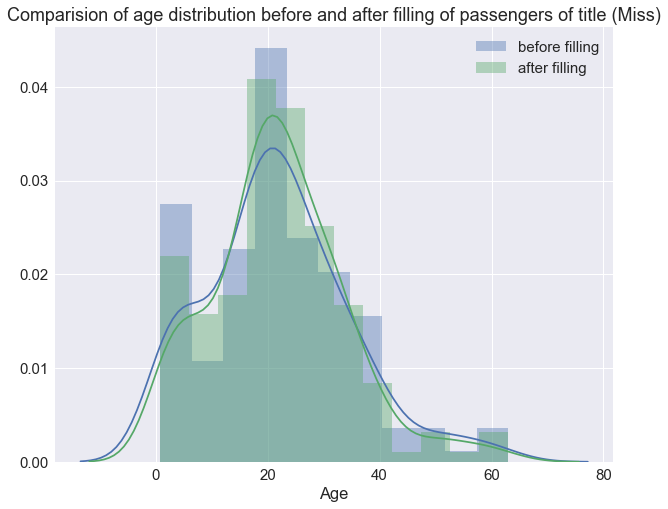

In [12]:
#First group: where records' title is "Miss"

#---------------------------------------------------<b4 filling missing values>-------------------------------------------------
#To get number of missing ages with "Miss" title
print(df['Age'][df.Title == 'Miss'].isnull().sum())

#to plot ages distrobution with "Miss" title 
sns.distplot(df['Age'][df.Title == 'Miss'].dropna(),label='before filling')


#filling missing values
df['Age'][(df.Title == 'Miss') & (np.isnan(df.Age))] = getAgeEstimates(df['Age'][df.Title == 'Miss'])
#------------------------------------------------<after filling missing values>-------------------------------------------------

#To get number of missing ages with "Miss" title
print(df['Age'][df.Title == 'Miss'].isnull().sum())

#to plot ages distrobution with "Miss" title 
sns.distplot(df['Age'][df.Title == 'Miss'],label='after filling')
plt.title("Comparision of age distribution before and after filling of passengers of title (Miss)")
plt.legend()


4
0


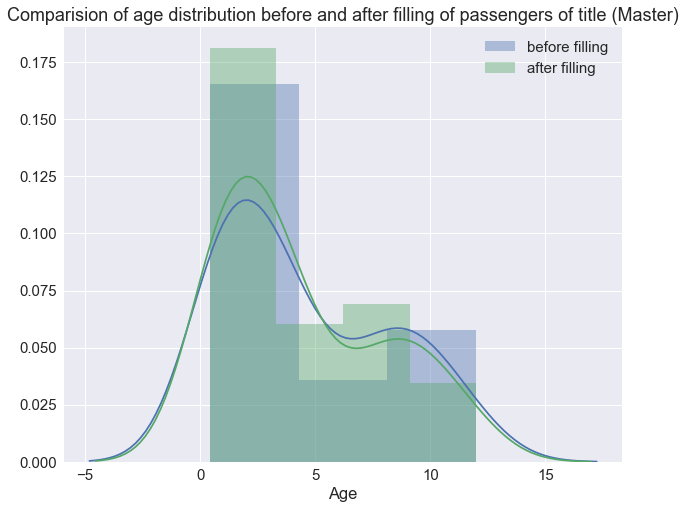

In [13]:
#Second group: where records' title is "Master"

#---------------------------------------------------<b4 filling missing values>-------------------------------------------------
#To get number of missing ages with "Miss" title
print(df['Age'][df.Title == 'Master'].isnull().sum())

#to plot ages distrobution with "Miss" title 
sns.distplot(df['Age'][df.Title == 'Master'].dropna(),label='before filling')

#filling missing values
df['Age'][(df.Title == 'Master') & (np.isnan(df.Age))] = getAgeEstimates(df['Age'][df.Title == 'Master'])
#------------------------------------------------<after filling missing values>-------------------------------------------------

#To get number of missing ages with "Miss" title
print(df['Age'][df.Title == 'Master'].isnull().sum())

#to plot ages distrobution with "Miss" title 
sns.distplot(df['Age'][df.Title == 'Master'],label='after filling')
plt.title("Comparision of age distribution before and after filling of passengers of title (Master)")
plt.legend()

119
0


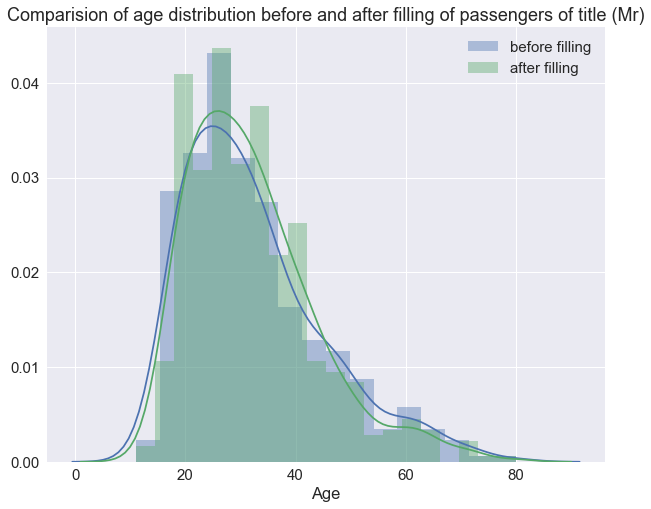

In [14]:
#Third group: where records' title is "Mr"

#---------------------------------------------------<b4 filling missing values>-------------------------------------------------
#To get number of missing ages with "Miss" title
print(df['Age'][df.Title == 'Mr'].isnull().sum())

#to plot ages distrobution with "Miss" title 
sns.distplot(df['Age'][df.Title == 'Mr'].dropna(),label='before filling')

#filling missing values
df['Age'][(df.Title == 'Mr') & (np.isnan(df.Age))] = getAgeEstimates(df['Age'][df.Title == 'Mr'])
#------------------------------------------------<after filling missing values>-------------------------------------------------

#To get number of missing ages with "Miss" title
print(df['Age'][df.Title == 'Mr'].isnull().sum())

#to plot ages distrobution with "Miss" title 
sns.distplot(df['Age'][df.Title == 'Mr'],label='after filling')
plt.title("Comparision of age distribution before and after filling of passengers of title (Mr)")
plt.legend()

17
0


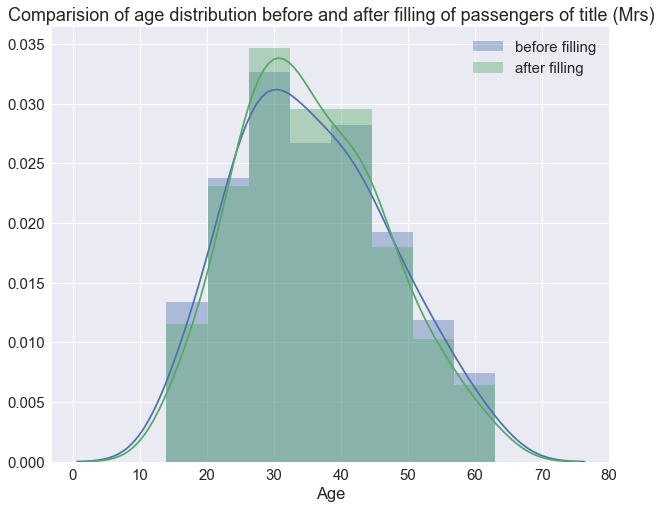

In [15]:
#Fourth group: where records' title is "Mrs"

#---------------------------------------------------<b4 filling missing values>-------------------------------------------------
#To get number of missing ages with "Miss" title
print(df['Age'][df.Title == 'Mrs'].isnull().sum())

#to plot ages distrobution with "Miss" title 
sns.distplot(df['Age'][df.Title == 'Mrs'].dropna(),label='before filling')

#filling missing values
df['Age'][(df.Title == 'Mrs') & (np.isnan(df.Age))] = getAgeEstimates(df['Age'][df.Title == 'Mrs'])
#------------------------------------------------<after filling missing values>-------------------------------------------------

#To get number of missing ages with "Miss" title
print(df['Age'][df.Title == 'Mrs'].isnull().sum())

#to plot ages distrobution with "Miss" title 
sns.distplot(df['Age'][df.Title == 'Mrs'],label='after filling')
plt.title("Comparision of age distribution before and after filling of passengers of title (Mrs)")
plt.legend()

1
0


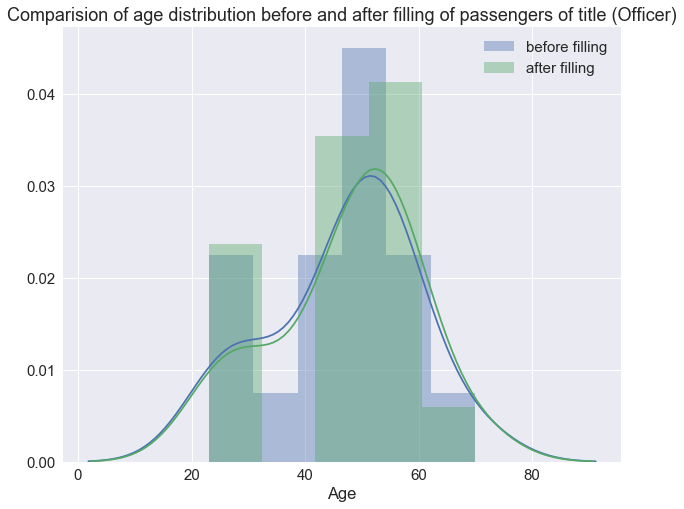

In [16]:
#Fifth group: where records' title is "Officer"

#---------------------------------------------------<b4 filling missing values>-------------------------------------------------
#To get number of missing ages with "Miss" title
print(df['Age'][df.Title == 'Officer'].isnull().sum())

#to plot ages distrobution with "Miss" title 
sns.distplot(df['Age'][df.Title == 'Officer'].dropna(),label='before filling')

#filling missing values
df['Age'][(df.Title == 'Officer') & (np.isnan(df.Age))] = getAgeEstimates(df['Age'][df.Title == 'Officer'])
#------------------------------------------------<after filling missing values>-------------------------------------------------

#To get number of missing ages with "Miss" title
print(df['Age'][df.Title == 'Officer'].isnull().sum())

#to plot ages distrobution with "Miss" title 
sns.distplot(df['Age'][df.Title == 'Officer'],label='after filling')
plt.title("Comparision of age distribution before and after filling of passengers of title (Officer)")
plt.legend()

0


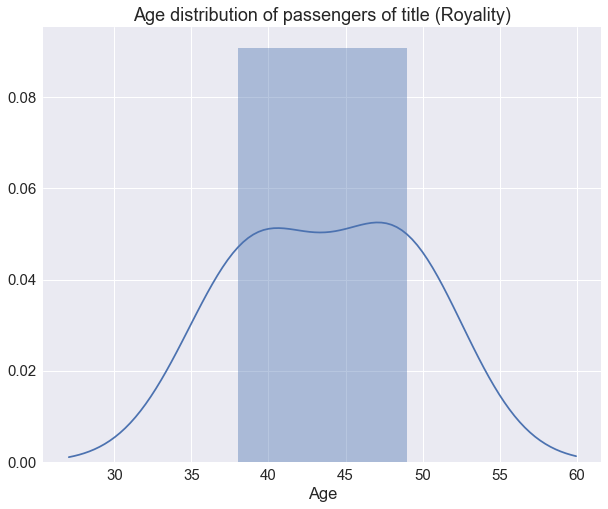

In [17]:
#Sixth and last group: where records' title is "Royalty"
# didn't fill it since no missing ages with title royalty

#To get number of missing ages with "Royalty" title
print(df['Age'][df.Title == 'Royalty'].isnull().sum())

#To plot ages distrobution with "Royalty" title
sns.distplot(df['Age'][df.Title == 'Royalty'].dropna(),label='Royalty')

plt.title("Age distribution of passengers of title (Royality)")

<a id='return'></a>
Now we can create TravelingWith column since the missing ages issue is resolved.   [Link to go back to column creation section](#run)

In [18]:
# add new column to classify passengers depending on 5 different factors 
df['TravelingWith']= df[['Age','FamilySize','Sex','Parch','SibSp']].apply(travelingWith,axis=1)

<a id='3'></a>

<hr>
## Third Phase: Exploring the Data
In this phase, I'll start with exploring the data and further study its variables distributions to discover patterns. Then, I'll mainly focus on answering the questions I've listed at the start of this notebook using data visualization and descriptive statistics.

<a id='3.1'></a>
###  Variables Distribution and Its Interesting Insights

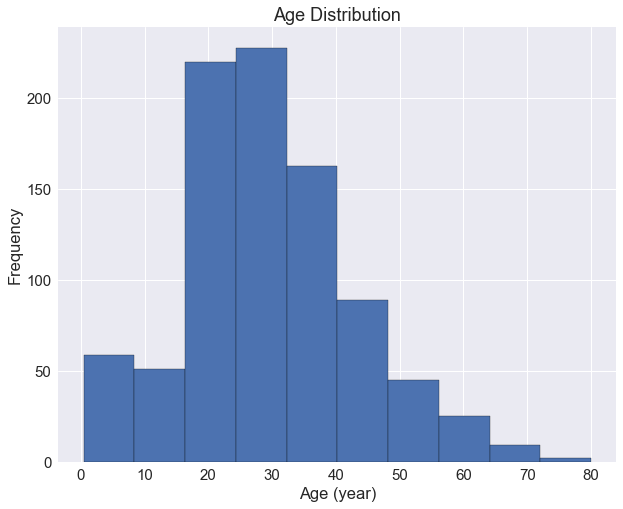

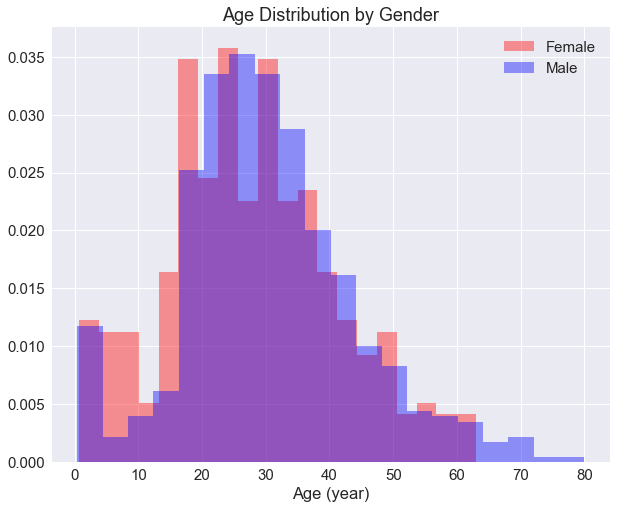

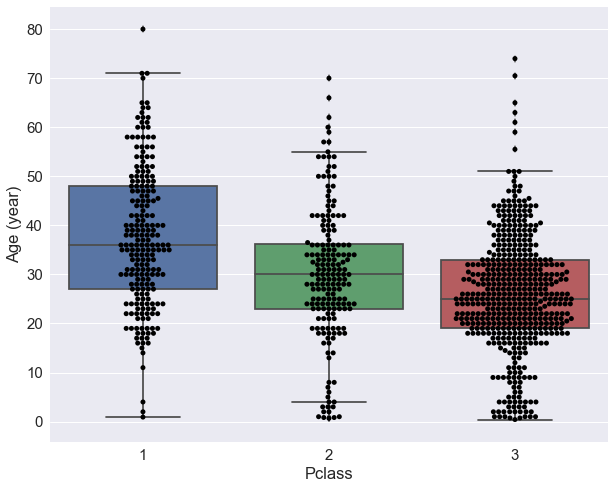

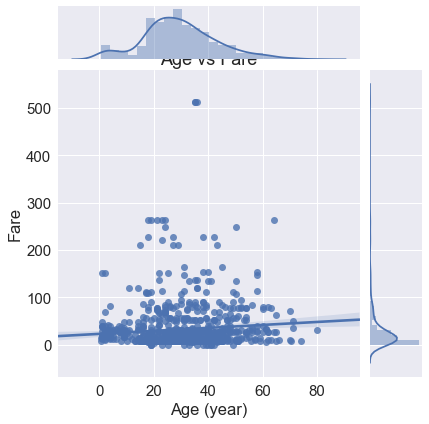

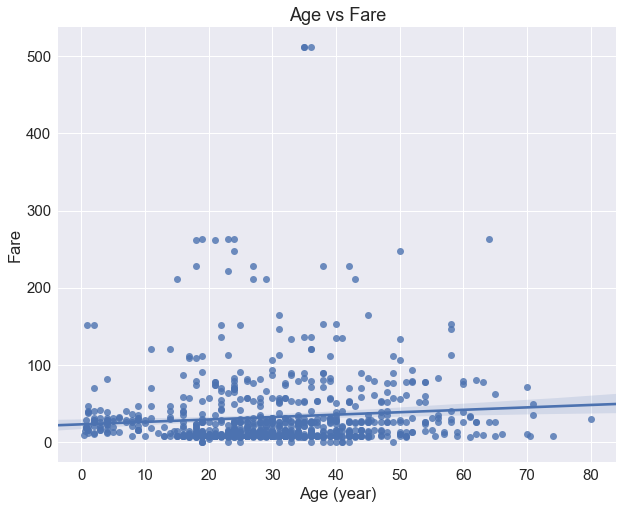

In [19]:
#General age distribution <after filling missing values>
df['Age'].plot(kind='hist', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel('Age (year)')
plt.show()


#Age distribution by gender <after filling missing values>
kwargs= dict(histtype='stepfilled', normed=True,alpha=.4,bins=20)
plt.hist(df['Age'][df['Sex'] == 'female'].dropna().values,color='r',label='Female', **kwargs)
plt.hist(df['Age'][df['Sex'] == 'male'].dropna().values,color='b',label='Male', **kwargs)
plt.title("Age Distribution by Gender")
plt.legend()
plt.xlabel('Age (year)')
plt.show()
#Credit: python data science handbook


#Age distribution by class <after filling missing values>
sns.boxplot(x="Pclass", y="Age", data=df)
sns.swarmplot(x="Pclass", y="Age",color='black', data=df)
plt.ylabel('Age (year)')
plt.show()

#Age vs fare
g = sns.JointGrid(x="Age", y="Fare", data=df).plot(sns.regplot, sns.distplot)
plt.xlabel('Age (year)')
plt.title("Age vs Fare")
plt.show()

sns.regplot(x="Age",y="Fare",data=df)
plt.xlabel('Age (year)')
plt.title("Age vs Fare")
plt.show()

### Observations:
- Ages have a close to normal distribution
- Ages by gender have a similar distribution. Small diffrences like the majority of children are females.
- Fisrt class ages are highly distributed. Second class comes in the second place. Third class has the narrowest distribution that is shifted to smaller ages. Meaning that the passengers of third class are mostly young as appossed to first class passengers which are distributed among a wide range of ages. 
- There is no strong relation between age and fare. However, there are two outliers that belong to passengers in their mid 30's.
--------------



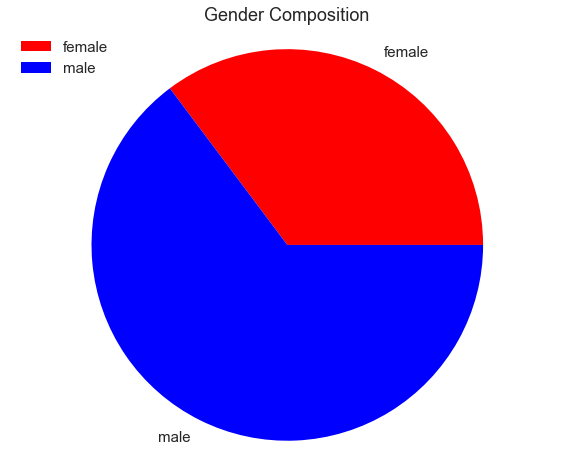

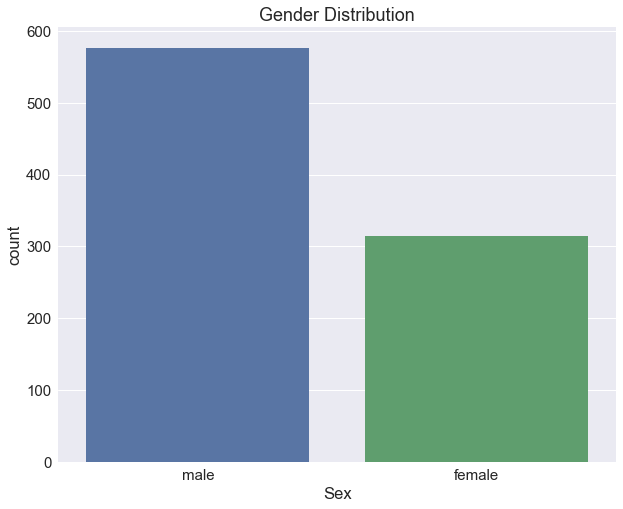

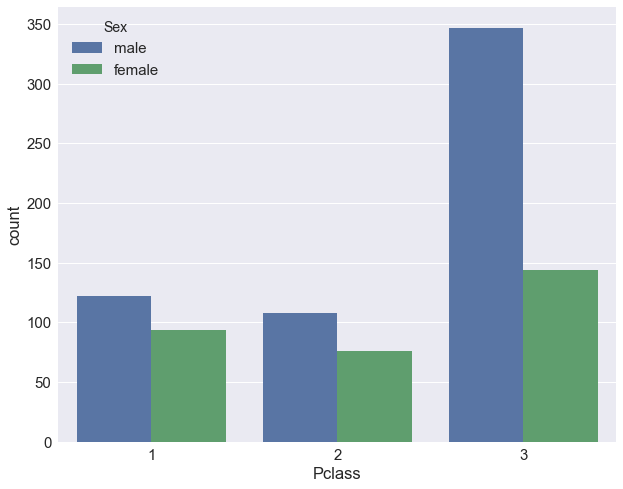

Sex      female  male
Title                
Master        0    40
Miss        184     0
Mr            0   517
Mrs         127     0
Officer       1    17
Royalty       1     3


In [20]:
#Gender composition
plt.pie(df.groupby('Sex').count()['BooleanGender'].values,labels=['female','male'], colors=['r','b'])
plt.title("Gender Composition")
plt.legend()
plt.axis('equal') 
plt.show()

#Gender distribution
sns.countplot(x="Sex", data=df)
plt.title("Gender Distribution")
plt.show()

#Gender by class
sns.countplot(x="Pclass",hue='Sex' ,data=df)
plt.show()

#Gneder vs Title
print(pd.crosstab(df['Title'],df['Sex']))


### Observations:
- Two third of the titanic passengers are males. 
- Number of third class males are 3 times larger then number of females belonging to the same class.
- Only one female with title officer.
----------------------------------------


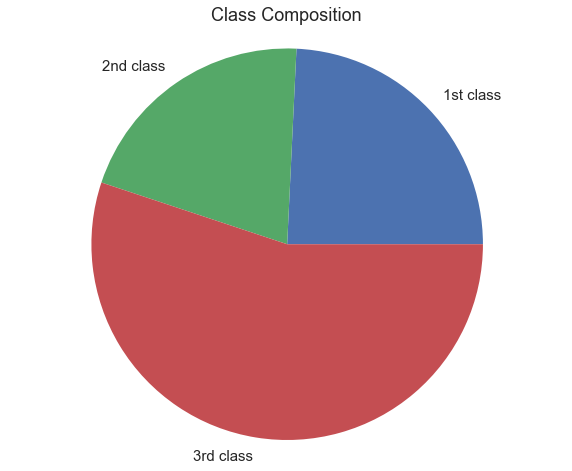

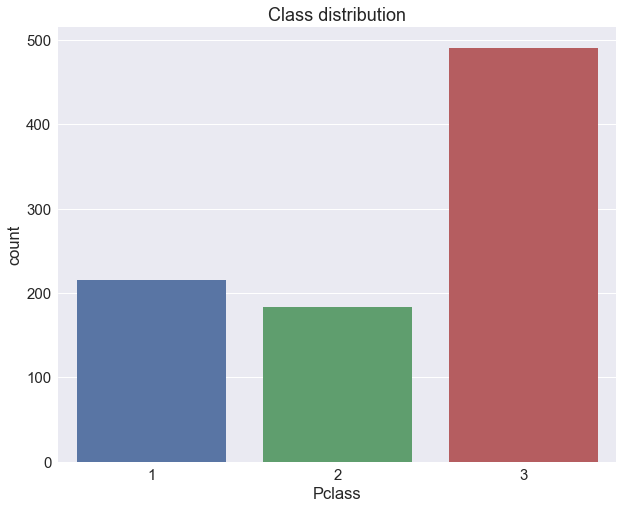

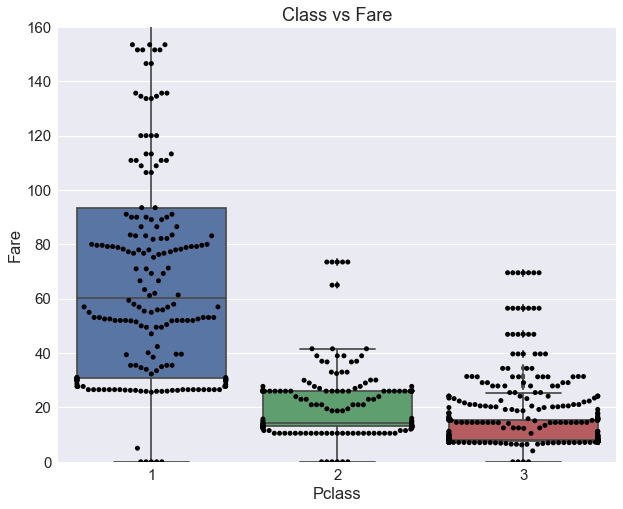

Class vs Title
Pclass     1   2    3
Title                
Master     3   9   28
Miss      48  34  102
Mr       107  91  319
Mrs       43  42   42
Officer   10   8    0
Royalty    4   0    0


In [21]:
#Class composition
plt.pie(df.groupby('Pclass').count()['Survived'].values, labels=['1st class','2nd class','3rd class'])
plt.title("Class Composition")
plt.axis('equal') 
plt.show()

#Class distribution
sns.countplot(x="Pclass", data=df)
plt.title("Class distribution")
plt.show()

#Class vs Fare
sns.boxplot(x="Pclass", y="Fare", data=df)
sns.swarmplot(x="Pclass", y="Fare",color='black' ,data=df)
plt.title("Class vs Fare")
#Removing outliers for better graph
plt.ylim(0,160)
plt.show()

#Class vs Title
print("Class vs Title")
print(pd.crosstab(df['Title'],df['Pclass']))



### Observations:
- More then half of the passenger belong to third class. 
- Number of passengers that belong of first and second class are almost the same.
- First class fare values is highly distibuted. Second class is less distributed. Third class is the least distributed among the three classes.
- All of the three classes have many fare outliers. Third class outliers are not shown in the graph in order to better show the variables distribution.
- All royalty passenger belong to first class. No officer belong to third class.

-------------------------------

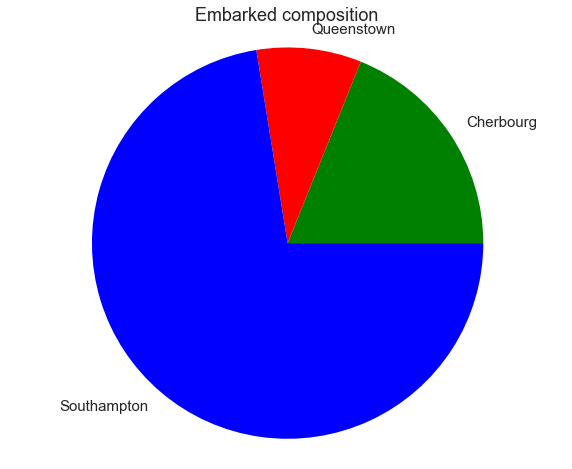

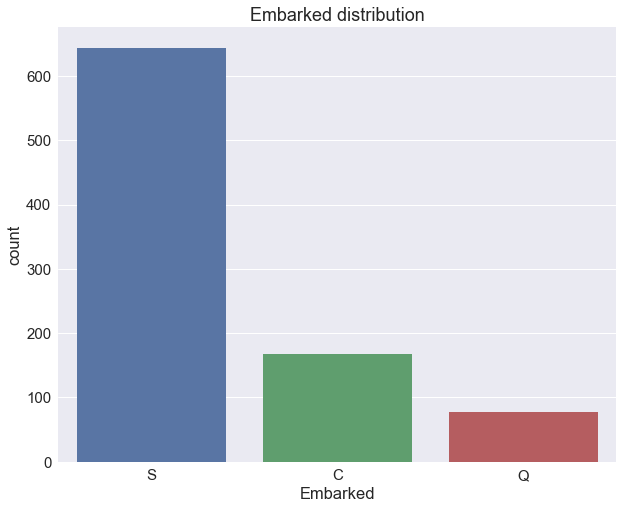

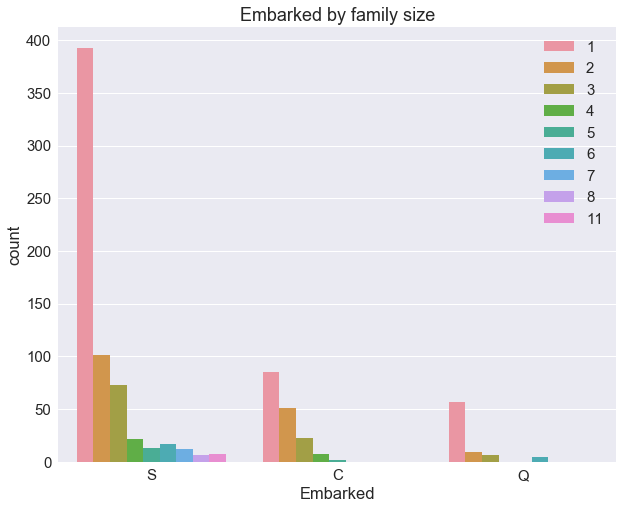

Embarked vs Family Size
Embarked     C   Q    S
FamilySize             
1           85  57  393
2           51   9  101
3           23   6   73
4            7   0   22
5            2   0   13
6            0   5   17
7            0   0   12
8            0   0    6
11           0   0    7


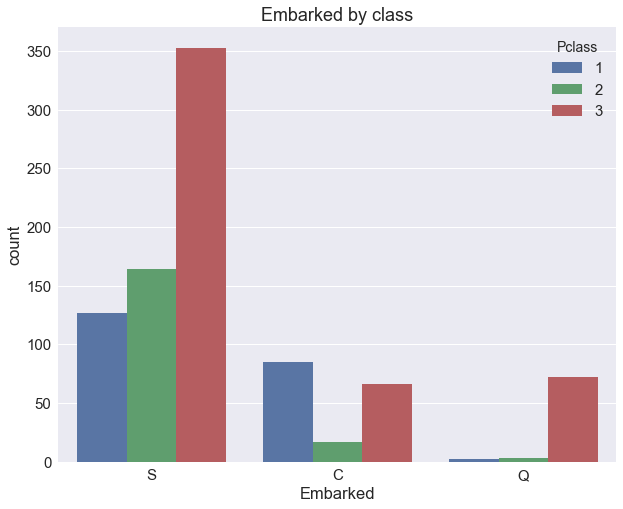

Embarked vs pclass
Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


In [22]:
#Embarked composition
plt.pie(df.groupby('Embarked').count()['NumericalEmbarked'].values, labels=['Cherbourg','Queenstown','Southampton'],colors=['g','r','b'])
plt.title("Embarked composition")
plt.axis('equal') 
plt.show()

#Embarked distribution
sns.countplot(x="Embarked", data=df)
plt.title("Embarked distribution")
plt.show()

#Embarked by family size
sns.countplot(x='Embarked',hue='FamilySize', data=df)
plt.legend(loc='upper right')
plt.title("Embarked by family size")
plt.show()

#cross table
print("Embarked vs Family Size")
print(pd.crosstab(df['FamilySize'],df['Embarked']))

#embarked by class
sns.countplot(x='Embarked',hue='Pclass', data=df)
plt.title("Embarked by class")            
plt.show()

#cross table
print("Embarked vs pclass")
print(pd.crosstab(df['Embarked'],df['Pclass']))


<img src="https://upload.wikimedia.org/wikipedia/commons/5/51/Titanic_voyage_map.png" style="float:center;width:1000px;height:400px;">
Source: https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic

### Observations:
- Majority of the passengers embarked from Southampton which's the ship's first stop. The second stop of titanic, Cherbourg, comes in second place in terms of number of passengers embarked from it. Finally, the least number passengers embarked from the last stop. As we see, there is a postive correlation between the ship's stop rank and the number of passengers embarked during that stop.
- Almost all of the large families embarked from Southampton and that is normal since this group represent two thirds of the ships passengers. Meaning that it's more expected to have variations in large group rather then small group.
- Most of the second class passengers embarked from Southampton.
- Almost all of the passengers who embarked from the last stop (Queenstown) belong to third class.
----------------------------------

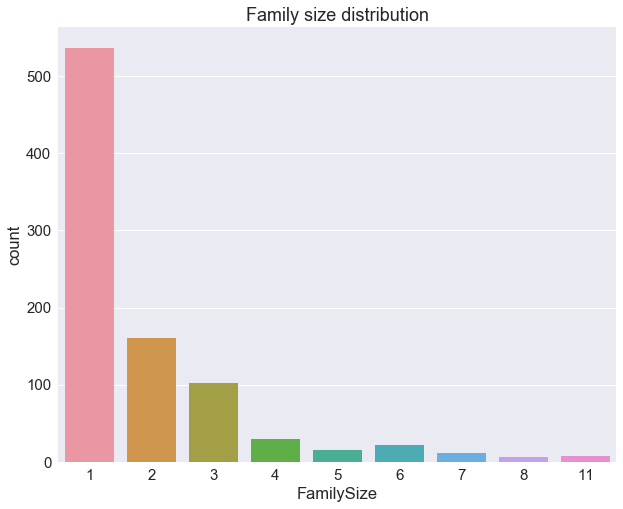

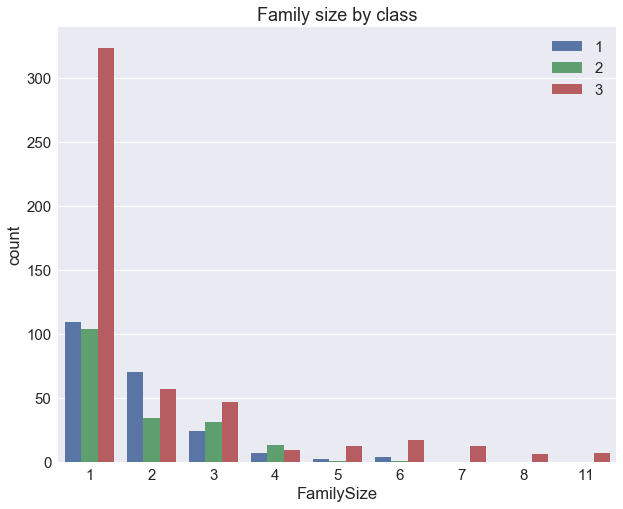

Family Size vs Pclass
Pclass        1    2    3
FamilySize               
1           109  104  324
2            70   34   57
3            24   31   47
4             7   13    9
5             2    1   12
6             4    1   17
7             0    0   12
8             0    0    6
11            0    0    7


In [23]:
#Family size


#Family size distribution
sns.countplot(x="FamilySize", data=df)
plt.title("Family size distribution")
plt.show()


#family size by class
sns.countplot(x="FamilySize",hue='Pclass', data=df)
plt.legend(loc='upper right')
plt.title("Family size by class")
plt.show()

#cross table
print("Family Size vs Pclass")
print(pd.crosstab(df['FamilySize'],df['Pclass']))

### Observations:
- More than half of the passengers are traveling alone. Third of the passengers are traveling with small family size (2-4). Very few large families (5-11).
- Majority of the third class passengers are traveling alone. As appossed to first and second class where the number of passengers traveling alone is close to the number of passengers traveling with a family.
- Most of the large families are from third class passengers.
- Note that we have only 7 passengers with 10 as a family size.This indicates that maybe there is some errors in the dataset or the dataset is incomplete. 
---------------------------


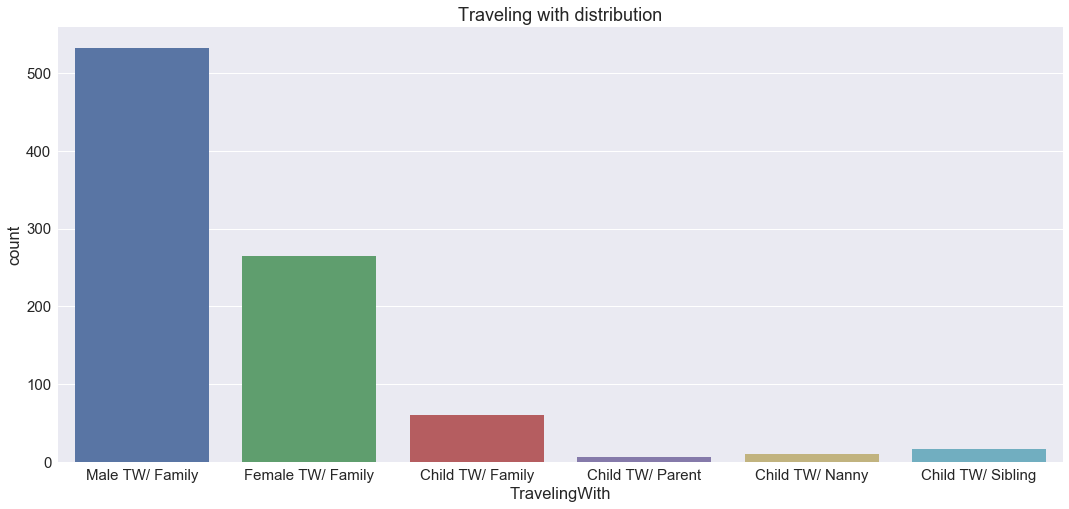

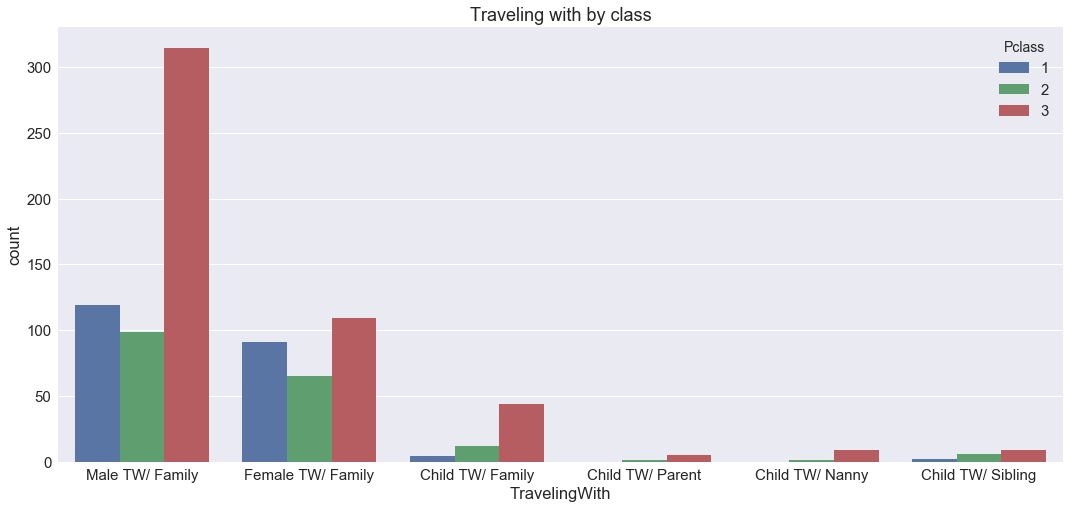

Travleling with vs Pclass
Pclass               1   2    3
TravelingWith                  
Child TW/ Family     4  12   44
Child TW/ Nanny      0   1    9
Child TW/ Parent     0   1    5
Child TW/ Sibling    2   6    9
Female TW/ Family   91  65  109
Male TW/ Family    119  99  315


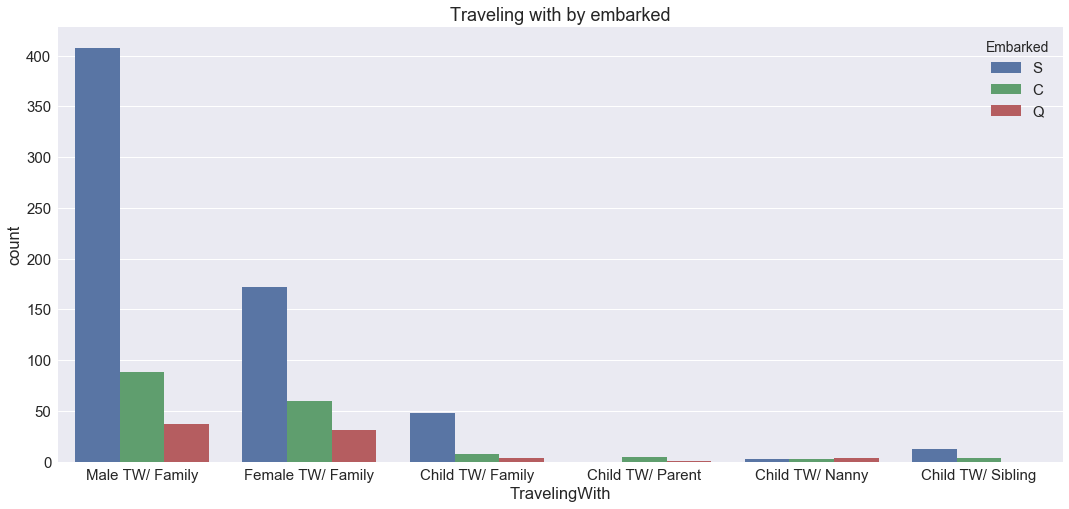

Travleling with vs Embarked
Embarked            C   Q    S
TravelingWith                 
Child TW/ Family    8   4   48
Child TW/ Nanny     3   4    3
Child TW/ Parent    5   1    0
Child TW/ Sibling   4   0   13
Female TW/ Family  60  31  172
Male TW/ Family    88  37  408


In [24]:
pylab.rcParams[ 'figure.figsize' ] = 18 , 8

#Traveling with distribution
sns.countplot(x="TravelingWith", data=df)
plt.title("Traveling with distribution")
plt.show()

#Traveling with by class
sns.countplot(x="TravelingWith",hue='Pclass', data=df)
plt.title("Traveling with by class")
plt.show()

#cross table
print("Travleling with vs Pclass")
print(pd.crosstab(df['TravelingWith'],df['Pclass']))

#Traveling with by embarked
sns.countplot(x="TravelingWith",hue='Embarked', data=df)
plt.title("Traveling with by embarked")
plt.show()

#cross table
print("Travleling with vs Embarked")
print(pd.crosstab(df['TravelingWith'],df['Embarked']))

### Observations:
- Almost half of the passengers are males who are traveling alone.
- Minority of the passengers are children. In other words, adult represent the majority group on the titanic.
- Number of male passengers who are traveling alone is approximately three times larger then those who are traveling with family member/s. While number females traveling with family is slightly larger than those who are traveling alone.
- Most of the children are traveling with families. Very few children traveled with nannies.
- All of the children traveling with nannies belong to the third class and embarked from the three stops.
- High percentage of the females embarked from the third stop (Queenstown) are traveling alone.
---------------------------



<a id='3.2'></a>
###  Studying Passengers Survival Factors

From the [correlation heatmap](#heatmap) illusturated before, we see that passenger's gender and title is correlated with passengers suvival. In the following section I'll investigate more into this. I'll also study other variables to unveil any correlation hidden from the calculation.

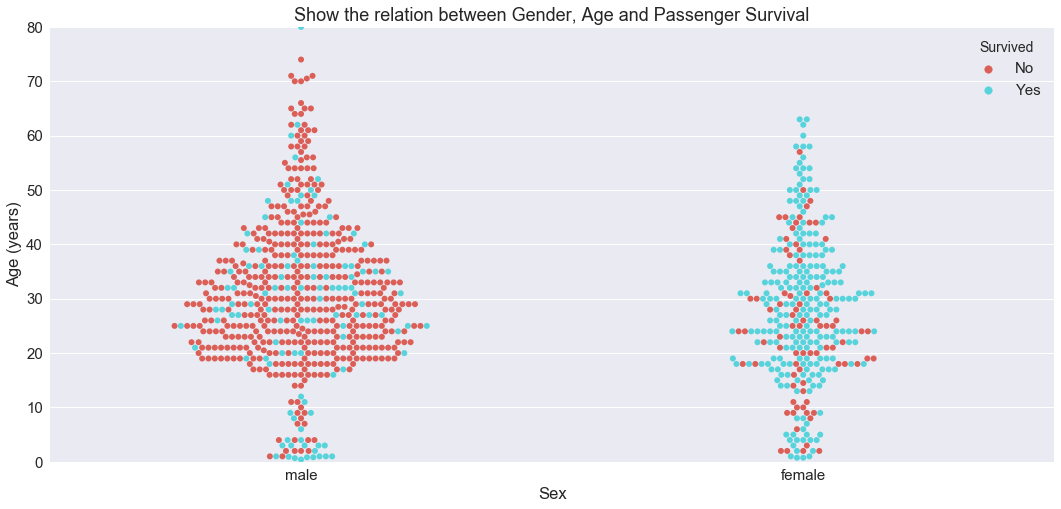

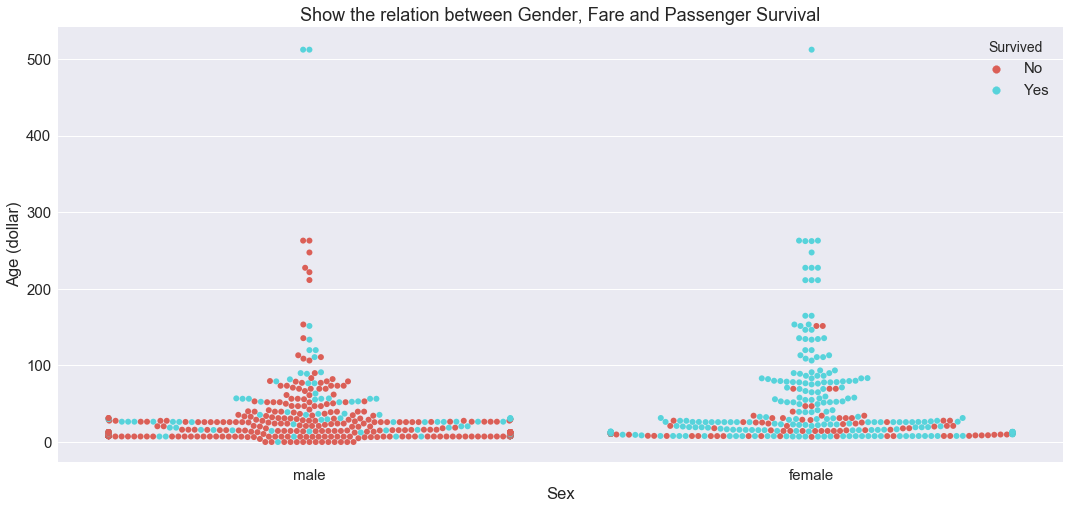

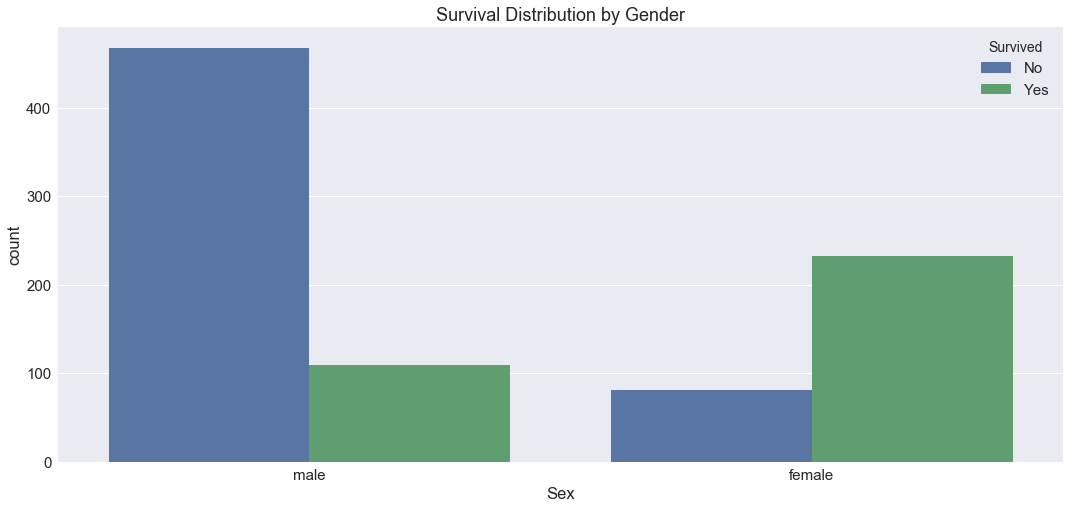

In [25]:
#Comparision of Gender,Age and survived.
sns.swarmplot(x="Sex", y="Age", hue="Survived",palette='hls',size=6,data=df)
plt.ylabel("Age (years)")
plt.title("Show the relation between Gender, Age and Passenger Survival")
plt.ylim(0,80)
plt.show()

#Comparision of Gender,Fare and survived.
sns.swarmplot(x="Sex", y="Fare", hue="Survived",palette='hls',size=6,data=df)
plt.ylabel("Age (dollar)")
plt.title("Show the relation between Gender, Fare and Passenger Survival")
plt.show()


#Survived distribution
sns.countplot(x="Sex",hue='Survived', data=df)
plt.title("Survival Distribution by Gender")
plt.show()


### Observations:
- Even though males represent the larger group of the ship's passengers, most of those who survived are females.
- A good number of male survivals fall into the group of (0-15) ages.
- An interesting observation is that males who paid an extremely high fare also happend to be survivals.
---------------------------


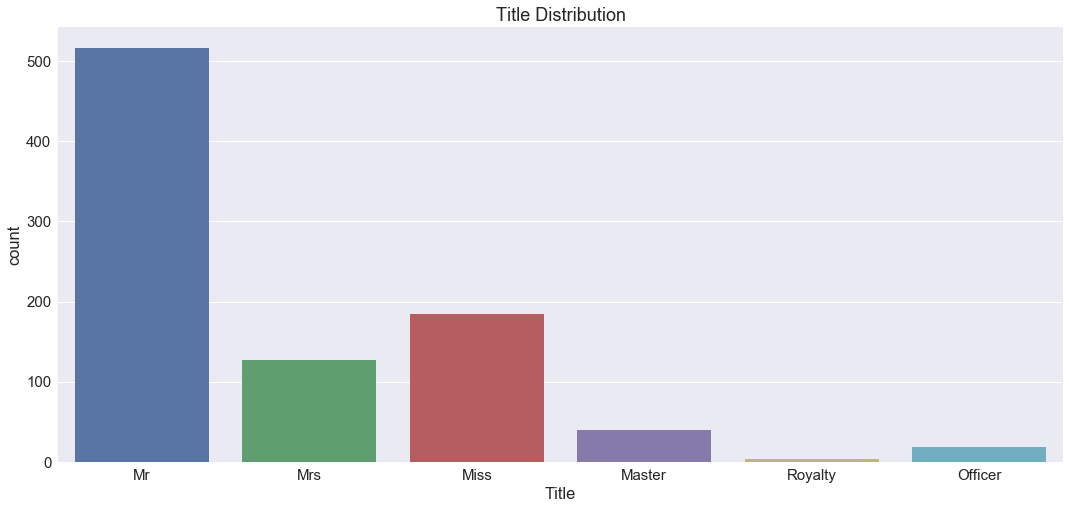

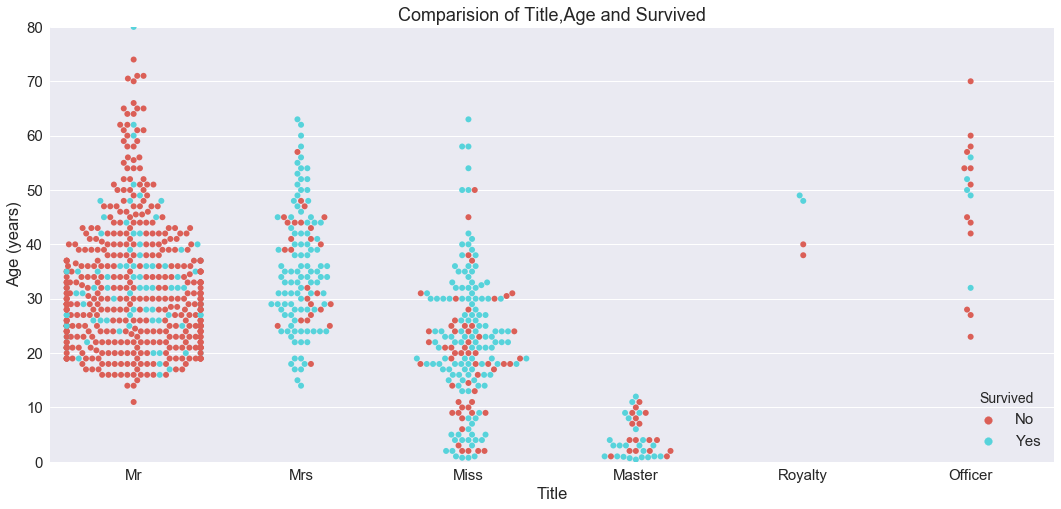

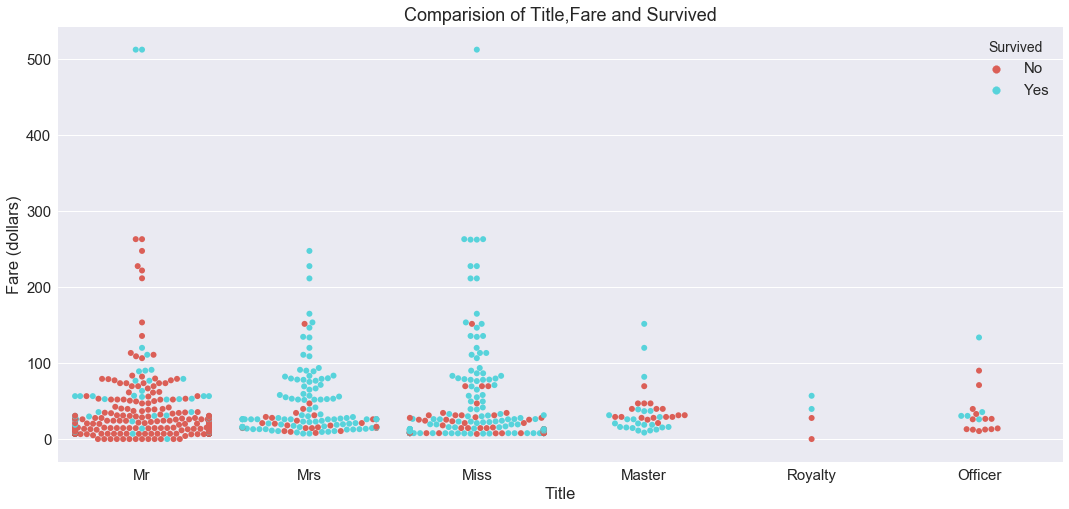

Title vs Survived


Survived,No,Yes
Title,,
Master,17,23
Miss,55,129
Mr,436,81
Mrs,26,101
Officer,13,5
Royalty,2,2


In [26]:
#title distribution
sns.countplot(x="Title", data=df)
plt.title("Title Distribution")
plt.show()

#Comparision of Title,Age and Survived.
sns.swarmplot(x="Title", y="Age", hue="Survived",palette='hls',size=6,data=df)
plt.ylabel("Age (years)")
plt.title("Comparision of Title,Age and Survived")
plt.ylim(0,80)
plt.show()

#Comparision of Title,Fare and Survived.
sns.swarmplot(x="Title", y="Fare", hue="Survived",palette='hls',size=6,data=df)
plt.ylabel("Fare (dollars)")
plt.title("Comparision of Title,Fare and Survived")
plt.show()

#crosstable of title and survived
print('Title vs Survived')
pd.crosstab(df['Title'],df['Survived']) 

### Observations:
- Majority of the survivals have either Mrs, Miss or Master as title. Meaning they're are females or male children.  
- Can't state any observation about officers and royalty passengers due to the small group size.
---------------------------


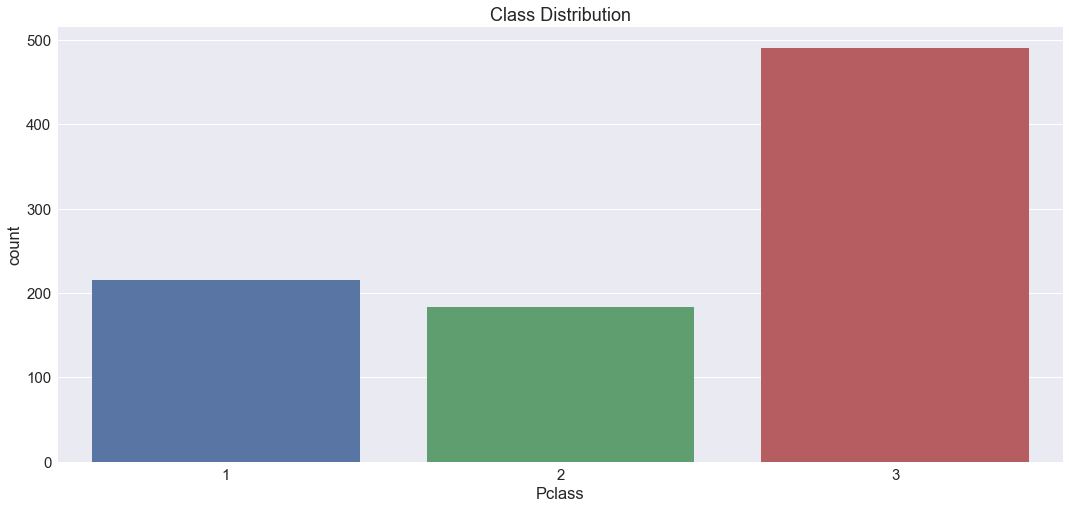

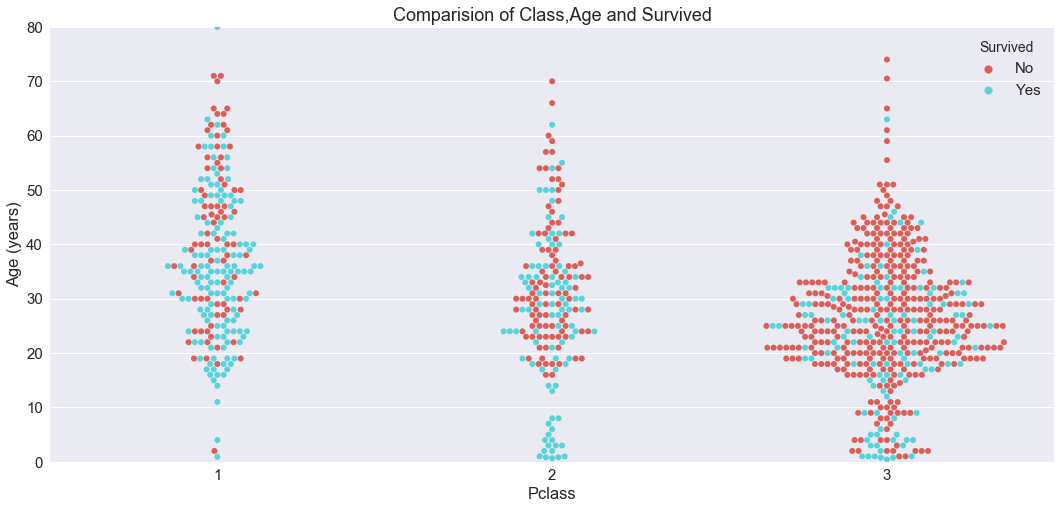

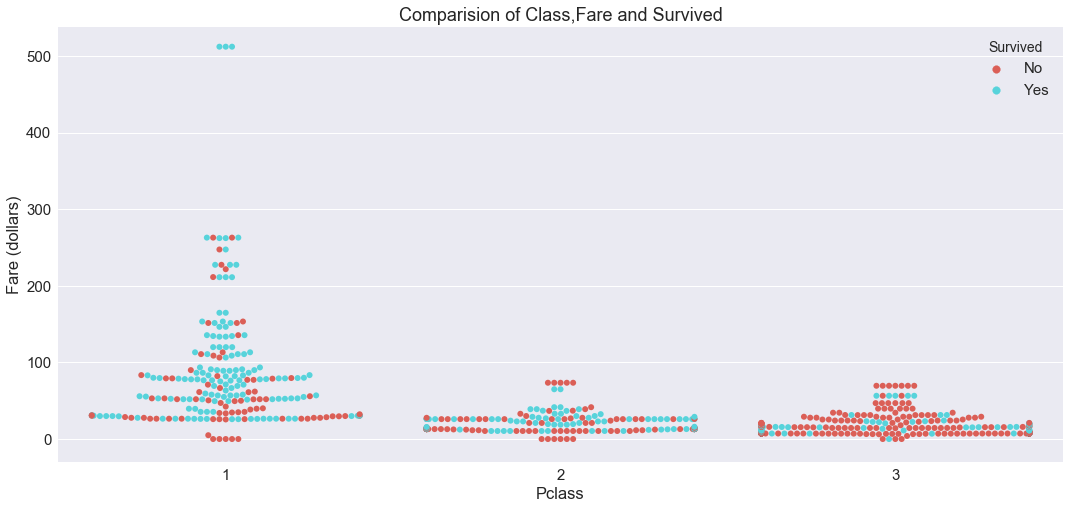

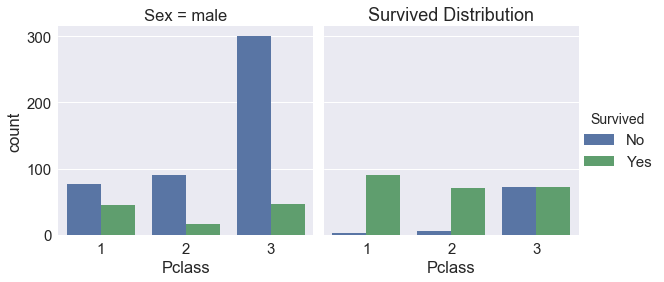

In [27]:
#class distribution
sns.countplot(x="Pclass", data=df)
plt.title("Class Distribution")
plt.show()

#Comparision of Class,Age and Survived.
sns.swarmplot(x="Pclass", y="Age", hue="Survived",palette='hls',size=6,data=df)
plt.ylabel("Age (years)")
plt.title("Comparision of Class,Age and Survived")
plt.ylim(0,80)
plt.show()

#Comparision of Class,Fare and Survived.
sns.swarmplot(x="Pclass", y="Fare", hue="Survived",palette='hls',size=6,data=df)
plt.ylabel("Fare (dollars)")
plt.title("Comparision of Class,Fare and Survived")
plt.show()

#Survived distribution
sns.factorplot(x="Pclass",hue='Survived',col='Sex',kind='count', data=df)
plt.title("Survived Distribution")
plt.show()

### Observations:
- It's very obvious that the class played a significant role in passengers survival. Most females victoms were from the third class. While the highest precentage of males survivals were from first class.
- Another interesting insight the fare variable is correlated the passenger's class. Noting that the highest fare values fall in the first class. However, there isn't much fare difference between second and third class.
---------------------------


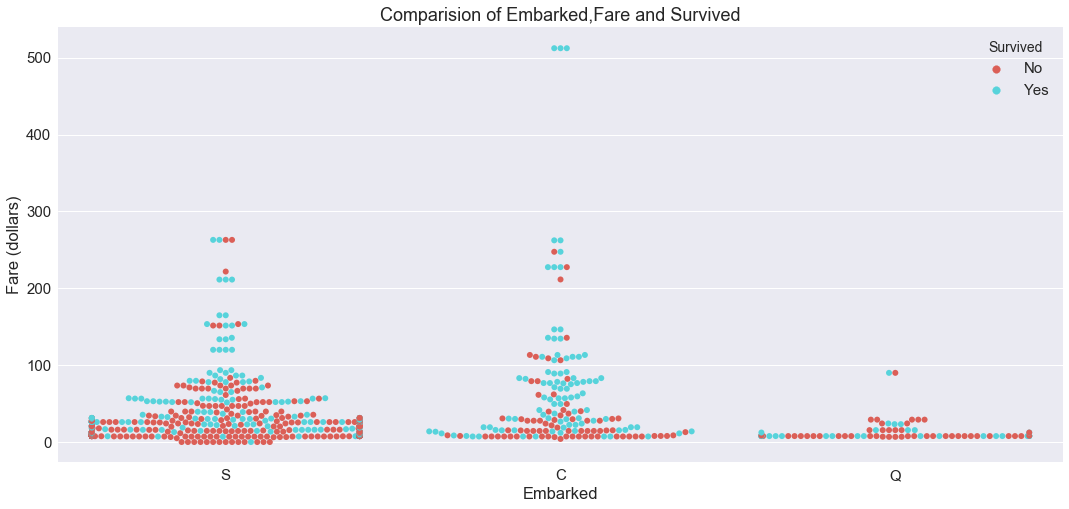

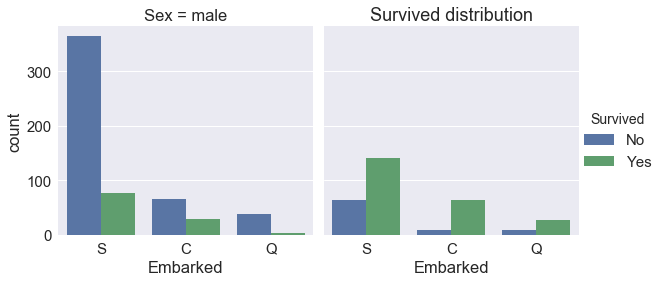

In [28]:
#Comparision of Embarked,Fare and Survived.
sns.swarmplot(x="Embarked", y="Fare", hue="Survived",palette='hls',size=6,data=df)
plt.ylabel("Fare (dollars)")
plt.title("Comparision of Embarked,Fare and Survived")
plt.show()

#Survived distribution
sns.factorplot(x="Embarked",hue='Survived',col='Sex',kind='count', data=df)
plt.title("Survived distribution")
plt.show()

### Observations:
- The second stop (Cherbourg) have slightly higher percentage of survival rate.
- Fare outliers embarked from Cherbourg.
- Against my expectations, fare and embarked variables don't seem to be correlated.
---------------------------


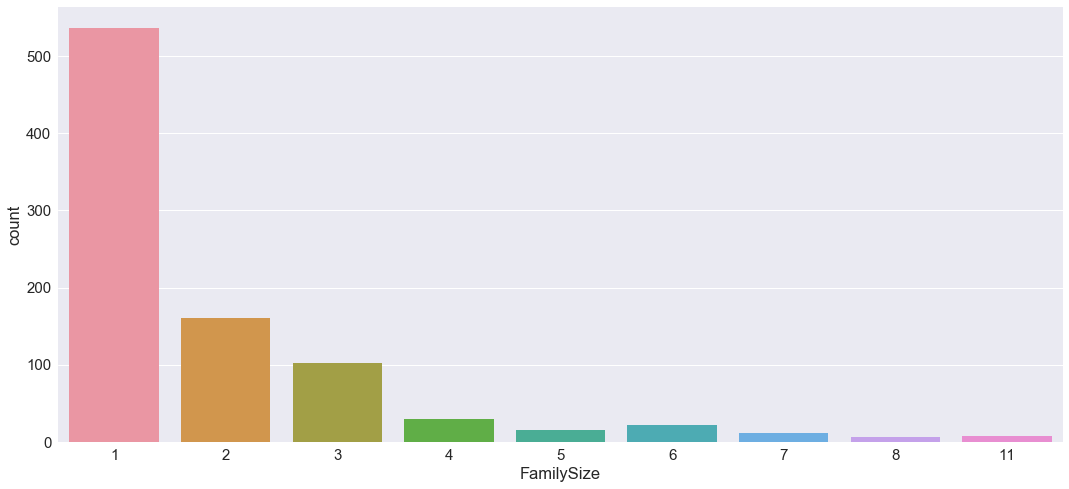

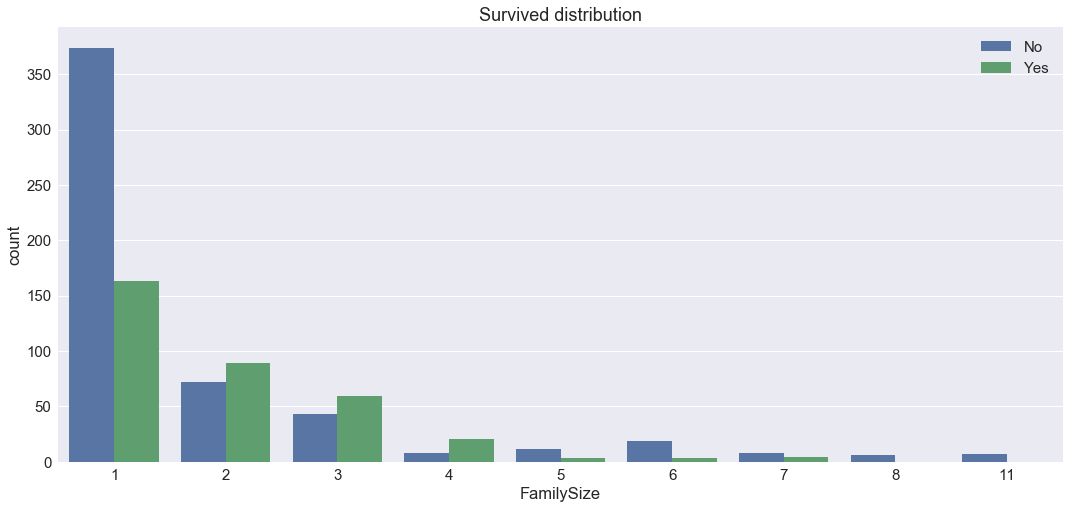

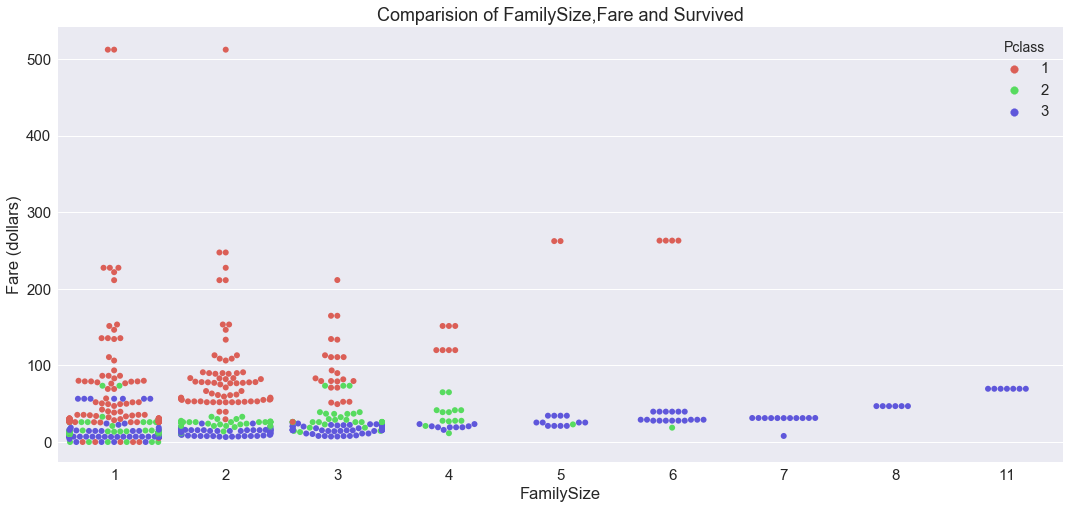

Survived     No  Yes
FamilySize          
1           374  163
2            72   89
3            43   59
4             8   21
5            12    3
6            19    3
7             8    4
8             6    0
11            7    0


In [29]:
#family size distribution
sns.countplot(x="FamilySize", data=df)
plt.show()

#Survived distribution
sns.countplot(x="FamilySize",hue='Survived', data=df)
plt.title("Survived distribution")
plt.legend(loc='upper right')
plt.show()

#Comparision of FamilySize,Fare and Survived.
sns.swarmplot(x="FamilySize", y="Fare", hue="Pclass",palette='hls',size=6,data=df)
plt.ylabel("Fare (dollars)")
plt.title("Comparision of FamilySize,Fare and Survived")
plt.show()

#crosstable
print(pd.crosstab(df['FamilySize'],df['Survived']))

### Observations:
- Family size and Survival rate doesn't seem to have strong correlation since survival distribution by family size is similar to family size general distribution.
- An interesting insight is passengers traveling with small families (2-4) have slightly higher survival rate. 
- Fare seems to be correlated with family size. Hence, these's a possiblity that the fare represent the ticket price of the whole family rathar than indvidual members. Fare is clearly correlated with Pclass.
---------------------------


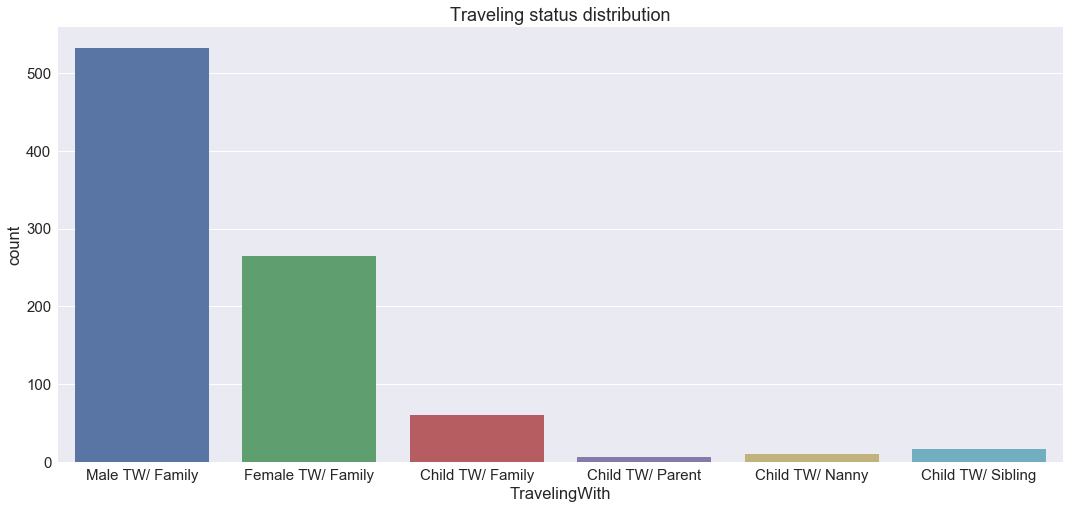

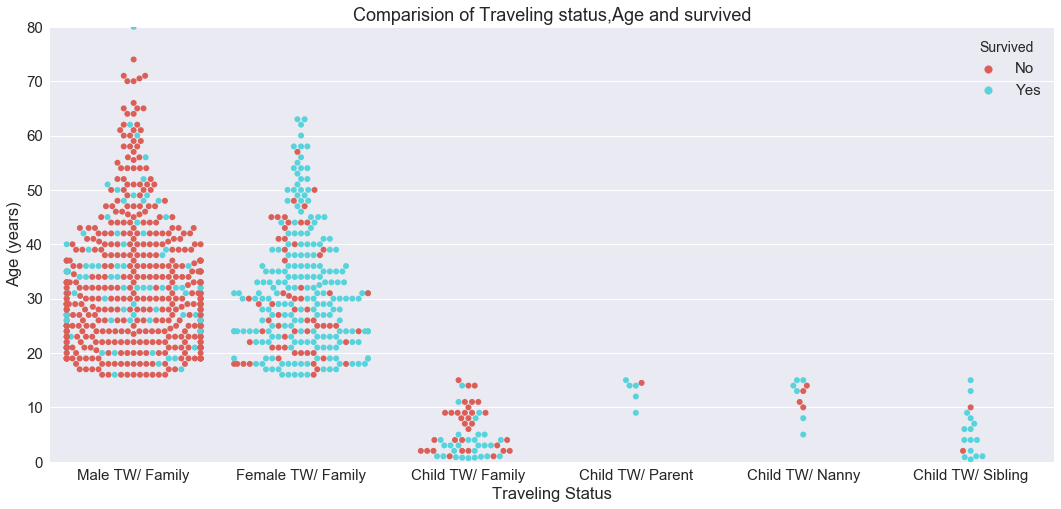

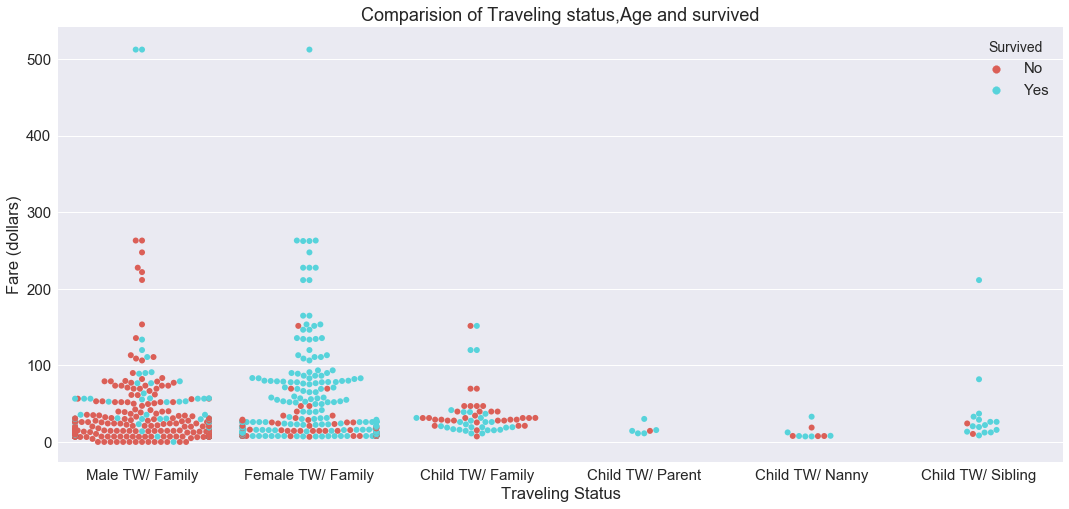

TravelingWith vs Survived
Survived            No  Yes
TravelingWith              
Child TW/ Family    32   28
Child TW/ Nanny      4    6
Child TW/ Parent     1    5
Child TW/ Sibling    2   15
Female TW/ Family   63  202
Male TW/ Family    447   86


In [30]:
pylab.rcParams[ 'figure.figsize' ] = 18 , 8

#Traveling status distribution
sns.countplot(x="TravelingWith", data=df)
plt.title("Traveling status distribution")
plt.show()

#Comparision of Traveling status,Age and Survived.
sns.swarmplot(x="TravelingWith", y="Age", hue="Survived",palette='hls',size=6,data=df)
plt.xlabel("Traveling Status")
plt.ylim(0,80)
plt.ylabel("Age (years)")
plt.title("Comparision of Traveling status,Age and survived")
plt.show()

#Comparision of Traveling status,Fare and Survived.
sns.swarmplot(x="TravelingWith", y="Fare", hue="Survived",palette='hls',size=6,data=df)
plt.ylabel("Fare (dollars)")
plt.title("Comparision of Traveling status,Age and survived")
plt.xlabel("Traveling Status")
plt.show()

#crosstable
print("TravelingWith vs Survived")
print(pd.crosstab(df['TravelingWith'],df['Survived']))

### Observations:
- Traveling status doesn't seem to be correlated with the survival rare. For instance, child traveling with whom didn't affect his survival possiblity.
- Adults have higher and more distributed fare values.
---------------------------

<a id='4'></a>
### Conclusion

At the end of this analysis, several factors were detected to be correlated passenger's survival rate. These factors are social/professional title, social/ticket class, age and gender. Title seems to have the highest correlation with passengers' survival. The reason for this is that it depends on both age and gender which are also great contributers in passenger survival. However, title provide a better classification than age or gender on their own. Moreover, passenger's class is also highly correlated with passengers' survival. First class passengers were the majority of survivals and vice versa.

Many intersting patterns were detected during the analysis such as how number of embarked passengers is correlated with the city's embarkation order. Titanic started from Southampton where most of passengers embarked from. Then moved to Queenstown where also a smaller grouped were picked up. Finaly it passed the last stop, Cherbourg, to pick up the smallest group out of the three. Moreover, children both traveling with nannies or relatives have the same survival rate. This pattern is a bit ambigous due to the small number of children observations. Futhermore, fare seems to have the highest correlation with passengers' class rather than their age or city of embarkation. By looking at how fare changes with class, we can sense that the class variable isn't equaly spaced. Second and third class observations are usually close but first class observations are a bit futher than the two.

Some questions aren't answered such as relation between a passenger's job and the survival rate. Another example is investigating whether the cabin location correlate with the passenger survival. Such questions couldn't be answered with the existing dataset due to its limitations. A good solution would be using/creating another dataset from the information found in the internet and correlate it with the existing one. <a href="https://www.encyclopedia-titanica.org/">Encyclopedia Titanica Website</a> have more details about the passengers including the passenger cabin and job title. Such information can be scrapped and used in further analysis

### References

##### Documentation pages:
- matplotlib
- seaborn
- pandas
##### Online Courses:
- intro to data analysis -Udacity
##### Books:
- Python Data Science Handbook
##### Websites:
- https://www.encyclopedia-titanica.org/
- kaggle